$$\require{mhchem}$$

# Transient CSTR (12 pt)

Consider the reaction:
\begin{align*}
\ce{A + 2B -> C}
\end{align*}

Assume this is a liquid phase CSTR, initially filled with only $C_A=1$M. The CSTR is 50 L and and the flow rate is 5 L/min. The inlet stream contains $C_A=5$M and $C_B=10$M. The reaction is elementary with $k_1=0.1$/min/M$^2$.

## Solve and plot for the transient concentration profile of reactants and product from t=0 to 50 min.

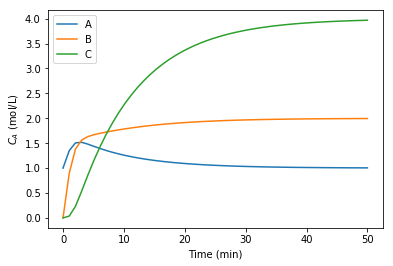

In [2]:
import numpy as np
from scipy.integrate import odeint

CAin = 5  # mol/L
v0 = 5   # L/min
V = 50.0    # reactor volume (L)

FA0 = CAin * v0  # molar flow of A into the reactor
FB0 = 10 * v0
FC0 = 0

k1 = 0.1   # rate constant (1/min/M^2)

def dCadt(C, t):
    
    Ca, Cb, Cc = C
    
    r1 = k1 * Ca * Cb**2
    rA = -r1
    rB = -2*r1
    rC = r1
    
    Fa = v0 * Ca
    Fb = v0 * Cb
    Fc = v0 * Cc

    dCdt = [FA0 / V - Fa / V + rA,
           FB0 / V - Fb / V + rB,
           FC0 / V - Fc / V + rC]

    return dCdt

tspan = np.linspace(0.0, 50.0)
Ca0 = [1,0,0] # initial condition in the tank
sol = odeint(dCadt, Ca0, tspan)

import matplotlib.pyplot as plt
plt.plot(tspan, sol)
plt.legend(['A','B','C'])
plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.show()

## Now consider two reactors in series. Each has the same volume as the original reactor and has the same initial conditions. The outlet of the first reactor goes to the inlet of the second. Write the mole balances for each species in each tank

\begin{align*}
    \frac{dN_{A1}}{dt} &= F_{A0} - F_{A1} + r_{A1}V \\
    \frac{dN_{B1}}{dt} &= F_{B0} - F_{B1} + r_{B1}V \\
    \frac{dN_{C1}}{dt} &= F_{C0} - F_{C1} + r_{C1}V \\
    \frac{dN_{A2}}{dt} &= F_{A1} - F_{A2} + r_{A2}V \\
    \frac{dN_{B2}}{dt} &= F_{B1} - F_{B2} + r_{B2}V \\
    \frac{dN_{C2}}{dt} &= F_{C1} - F_{C2} + r_{C2}V
\end{align*}

## Next, solve for the concentration profile in each. Plot the concentration profiles in separate plots side-by-side from t = 0 to 50 min (left for the first reactor, right for the second reactor)

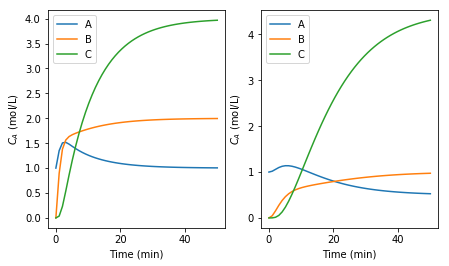

In [4]:
import numpy as np
from scipy.integrate import odeint

CAin = 5  # mol/L
v0 = 5   # L/min
V = 50.0    # reactor volume (L)

FA01 = CAin * v0  # molar flow of A into the reactor
FB01 = 10 * v0
FC01 = 0

k1 = 0.1   # rate constant (1/min/M^2)

def mole_balance(C, F0):
    FA0, FB0, FC0 = F0
    Ca, Cb, Cc = C
    
    r1 = k1 * Ca * Cb**2
    rA = -r1
    rB = -2*r1
    rC = r1
    
    Fa = v0 * Ca
    Fb = v0 * Cb
    Fc = v0 * Cc

    dCdt = [FA0 / V - Fa / V + rA,
           FB0 / V - Fb / V + rB,
           FC0 / V - Fc / V + rC]
    return dCdt

def dCadt(C, t):
    
    dCdt1 = mole_balance(C[0:3],[FA01,FB01,FC01])
    dCdt2 = mole_balance(C[3:], C[0:3]*v0)
    
    return dCdt1+dCdt2

tspan = np.linspace(0.0, 50.0)
Ca0 = [1,0,0,1,0,0] # initial condition in the tank
sol_twotank = odeint(dCadt, Ca0, tspan)

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
ax = plt.subplot(121)
plt.plot(tspan, sol_twotank[:,0:3])
plt.legend(['A','B','C'])
plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
ax = plt.subplot(122)
plt.plot(tspan, sol_twotank[:,3:])
plt.legend(['A','B','C'])
plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.show()

## Does the profiles of the first tank in this new system match the answer from 1.1? Should it?

Yes, they match, and yes, they should. The second reactor is downstream so should have no effect on the first.

## For the same reaction, solve for the concentration of a semi-batch system, starting with 20L with $C_A=1$M with no outlet stream. Plot  concentrations from t=0 to 6min (the point when it hits 50 L).

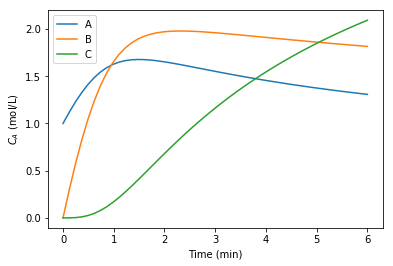

In [4]:
import numpy as np
from scipy.integrate import odeint

CAin = 5  # mol/L
v0 = 5   # L/min
V0 = 20.0    # reactor volume (L)

FA0 = CAin * v0  # molar flow of A into the reactor
FB0 = 10 * v0
FC0 = 0

k1 = 0.1   # rate constant (1/min/M^2)

def dNadt(N, t):
    V = V0 + 5*t
    Ca, Cb, Cc = N/V
    
    r1 = k1 * Ca * Cb**2
    rA = -r1
    rB = -2*r1
    rC = r1
    
    Fa = v0 * Ca
    Fb = v0 * Cb
    Fc = v0 * Cc

    dCdt = [FA0 + V*rA,
           FB0 + V*rB,
           FC0 + V*rC]

    return dCdt

tspan = np.linspace(0.0, 6.0)
N0 = [20,0,0] # initial condition in the tank
sol_semibatch = odeint(dNadt, N0, tspan)

import matplotlib.pyplot as plt
plt.plot(tspan, sol_semibatch[:,0]/(tspan*5+V0))
plt.plot(tspan, sol_semibatch[:,1]/(tspan*5+V0))
plt.plot(tspan, sol_semibatch[:,2]/(tspan*5+V0))

plt.legend(['A','B','C'])
plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.show()

## Plot the concentrations of product over time (from t=0 to 50 min) with the CSTR (1.1) compared with the semi-batch reactor. Which is higher? Why?

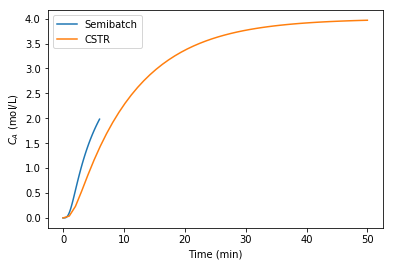

In [7]:
plt.plot(tspan, sol_semibatch[:,2]/(tspan*5+V0))
tspan_CSTR = np.linspace(0.0, 50.0)
plt.plot(tspan_CSTR, sol[:,2])
plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.legend(['Semibatch','CSTR'])
plt.show()


# Try solving the second problem from the first exam last year (the core/shell PFR). (6 pts)

Like last week, try to do this without looking at the solutions. We aren't going to grade this for accuracy since you already have the solutions, just whether you submit something that isn't a line-by-line copy of the answers.

We are looking to design a liquid phase membrane PFR (V=10L) with three channels for the rection system:
\begin{align}
\ce{A + B -> 4C}, k_1=0.1/M/s\\
\ce{A + C -> 3D}, k_2=0.5/M/s
\end{align}
The inner channel contains a feed of pure A with a concentration of 1M and flow rate of 2 L/s. A is very large and cannot pass any membrane. B,C,D can pass the first membrane ($k_{b,1}'=0.2/s,k_{c,1}'=0.4/s,k_{d,1}'=0.5/s$).  C,D are very small and can also pass the outer membrane ($k_{c,2}'=0.5/s,k_{d,2}'=0.7/s$). You may assume the volumetric flow rates are constant.  
![img](E1P2.png)

## How many unique species concentrations are there?

There are 9 unique species concentrations

## Write the mol balance for each of the species.  


$$\frac{dF_{Ainner}}{dV} = -r_1 - r_2$$

$$\frac{dF_{Binner}}{dV} = -r_1 + R_B$$

$$\frac{dF_{Cinner}}{dV} = 4r_1 - r_2 + R_{Cinner}$$

$$\frac{dF_{Dinner}}{dV} = 3r_2 + R_{Dinner}$$

$$-\frac{dF_{Bmiddle}}{dV} = - R_B$$

$$-\frac{dF_{Cmiddle}}{dV} = -R_{Cinner} + R_{Couter}$$

$$-\frac{dF_{Dmiddle}}{dV} = -R_{Dinner} + R_{Douter}$$

$$\frac{dF_{Couter}}{dV} = -R_{Couter}$$

$$\frac{dF_{Douter}}{dV} = -R_{Douter}$$

## Solve for and plot the concentration profiles for each species along the length of the reactor

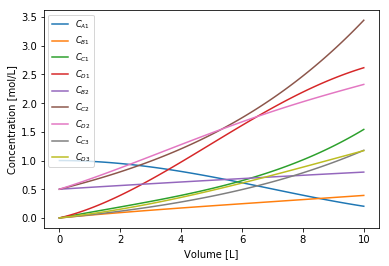

In [9]:
from matplotlib.font_manager import FontProperties

k1 = 0.1   # L/mol/s
k2 = 0.5   # L/mol/s

kb1 = 0.2  # 1/s
kc1 = 0.4  # 1/s
kd1 = 0.5  # 1/s

kc2 = 0.5  # 1/s
kd2 = 0.7  # 1/s

nu1 = 2
nu2 = 3
nu3 = 4

def dCdV(C, V):
    '''
    Create a function to calculate the change in species concentrations in each of the compartments
    as a function of reactor volume. We will use this function with `odeint` to integrate over
    theh entire reactor volume.
    '''
    Ca1, Cb1, Cc1, Cd1, Cb2, Cc2, Cd2, Cc3, Cd3 = C
    
    # Calculate reaction rates [mol/L/s]
    r1 = k1*Ca1*Cb1
    r2 = k2*Ca1*Cc1
    # Calculate mass transport rates between the inner and intermediate vessels [mol/L/s]
    Rb1 = kb1*(Cb2-Cb1)
    Rc1 = kc1*(Cc2-Cc1)
    Rd1 = kd1*(Cd2-Cd1)
    # Calculate mass transport rates between the intermediate and outer vessels [mol/L/s]
    Rc2 = kc1*(Cc3-Cc2)
    Rd2 = kd1*(Cd3-Cd2)
    
    # Calculate the differentials for each species in each compartment
    dA1dt = (-r1-r2)/nu1
    dB1dt = (Rb1-r1)/nu1
    dC1dt = (4*r1-r2+Rc1)/nu1
    dD1dt = (3*r2+Rd1)/nu1
    dB2dt = -(-Rb1)/nu2
    dC2dt = -(-Rc1+Rc2)/nu2
    dD2dt = -(-Rd1+Rd2)/nu2
    dC3dt = -Rc2/nu3
    dD3dt = -Rd2/nu3
    
    return [dA1dt, dB1dt, dC1dt, dD1dt, dB2dt, dC2dt, dD2dt, dC3dt, dD3dt]

# Solve
C0 = [1., 0., 0., 0., 0.5, 0.5, 0.5, 0., 0.]   # mol/L
V = 10.   # L
Vspan = np.linspace(0, V, 100)
sol = odeint(dCdV, C0, Vspan)

# Plot
plt.plot(Vspan, sol)
plt.xlabel('Volume [L]')
plt.ylabel('Concentration [mol/L]')
fontP = FontProperties()
fontP.set_size('small')
plt.legend(['$C_{A1}$', '$C_{B1}$', '$C_{C1}$', '$C_{D1}$',
            '$C_{B2}$', '$C_{C2}$', '$C_{D2}$',
            '$C_{C3}$','$C_{D3}$'],
           prop=fontP)
plt.show()

# Reaction engineering questions (2 pt)

Ask one question on piazza.  Post the link here (for example, https://piazza.com/class/jl5aabbtksz62s?cid=190).

## Bonus (1pt)

Answer someone else's question on Piazza. Post the link here.